In [1]:
# Segmentation of Images using Mean-shift clustering 

In [4]:
#Importing all the necessary libraries

import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [5]:
#Preprocessing the image (consider an image of peppers)

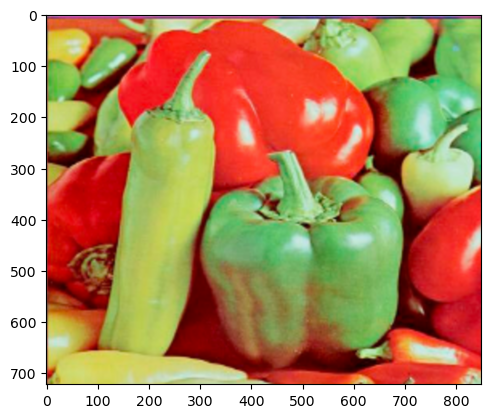

In [7]:
#Read and display the image

img = cv.imread('peppers.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

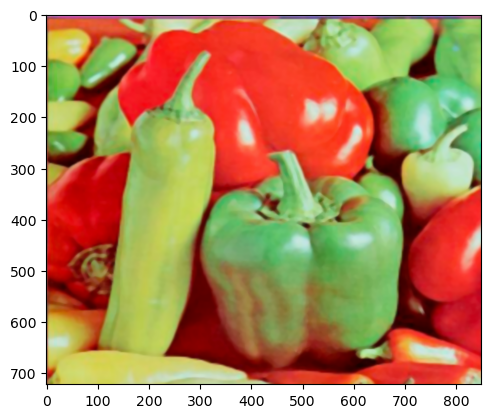

In [8]:
#using median blur to smooth the image

img = cv.medianBlur(img, 7)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

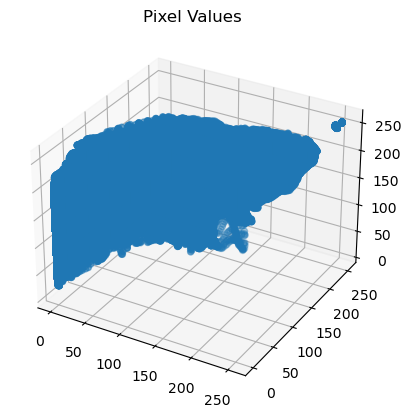

In [9]:
#plotting RGB values as 3d points

ax = plt.axes(projection ="3d")
ax.scatter3D(img[:,:,0],img[:,:,1],img[:,:,2])
ax.set_title('Pixel Values ')
plt.show()

In [10]:
#shape of the image

In [11]:
img.shape

(722, 850, 3)

In [12]:
#reshaping the image

X = img.reshape((-1,3))
print("shape: ",X.shape)
print("data type   : ",X.dtype)

shape:  (613700, 3)
data type   :  uint8


In [13]:
X = np.float32(X)

In [14]:
#Applying Mean-shift clustering for the image

bandwidth = estimate_bandwidth(X, quantile=.06, n_samples=3000)
bandwidth 

34.07688462002883

In [15]:
#Training the model 

ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=34.07688462002883, bin_seeding=True)

In [16]:
labeled=ms.labels_
labeled

array([7, 7, 7, ..., 5, 5, 5], dtype=int64)

In [17]:
clusters=ms.predict(X)
clusters

array([7, 7, 7, ..., 5, 5, 5], dtype=int64)

In [20]:
#List the unique clusters and convert back to unit8 for images
np.unique(labeled)
ms.cluster_centers_
cluster_int8=np.uint8(ms.cluster_centers_)
cluster_int8

array([[ 37,  52, 242],
       [ 95, 202, 181],
       [ 94, 182, 124],
       [  2,   4, 101],
       [ 15,  12, 198],
       [183, 221, 191],
       [134,  91, 180],
       [252, 251, 252],
       [134,  89, 111],
       [206, 159, 207],
       [185, 123, 146]], dtype=uint8)

In [21]:
#estimate the sample

ms.predict(X)

array([7, 7, 7, ..., 5, 5, 5], dtype=int64)

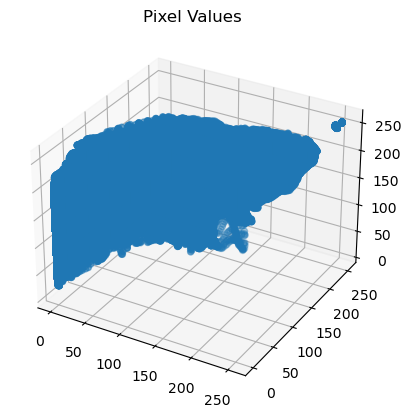

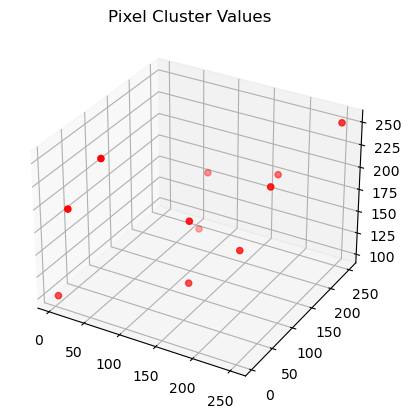

In [22]:
ax = plt.axes(projection ="3d")
ax.scatter3D(img[:,:,0],img[:,:,1],img[:,:,2])
ax.set_title('Pixel Values ')
plt.show()

ax = plt.axes(projection ="3d")
ax.set_title('Pixel Cluster Values  ')
ax.scatter3D(cluster_int8[:,0],cluster_int8[:,1],cluster_int8[:,2],color='red')
plt.show()

In [23]:
#Assign each data point to a cluster value and get a rectangular image
result=np.zeros(X.shape,dtype=np.uint8)

for label in np.unique(labeled):
    result[labeled==label,:]=cluster_int8[label,:]    
    

result=result.reshape(img.shape)

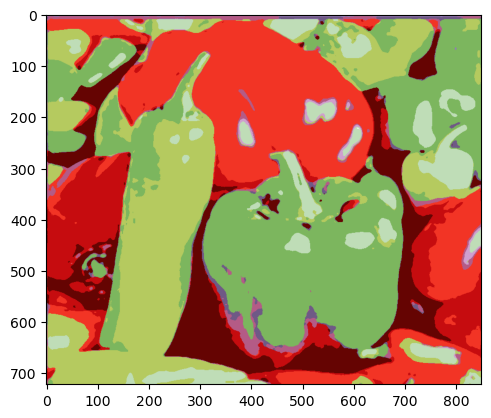

In [24]:
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.show()

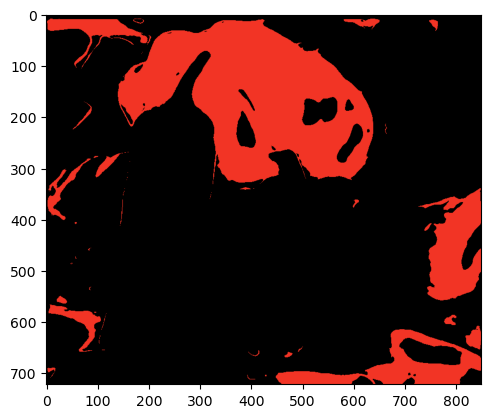

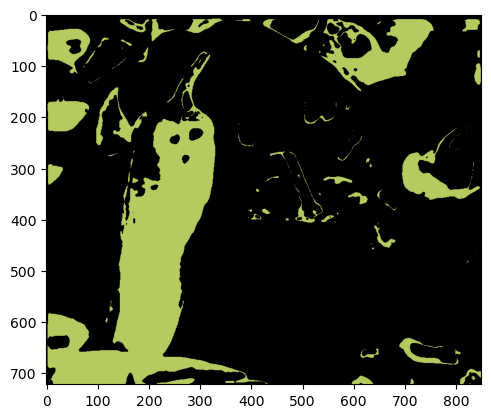

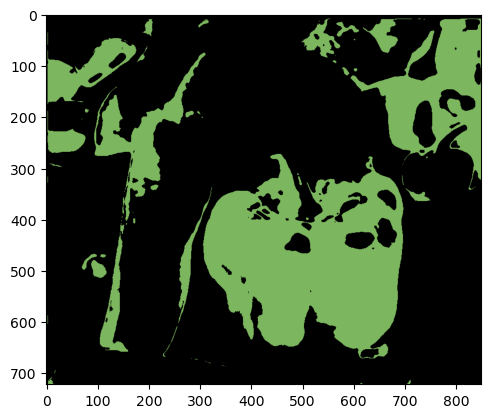

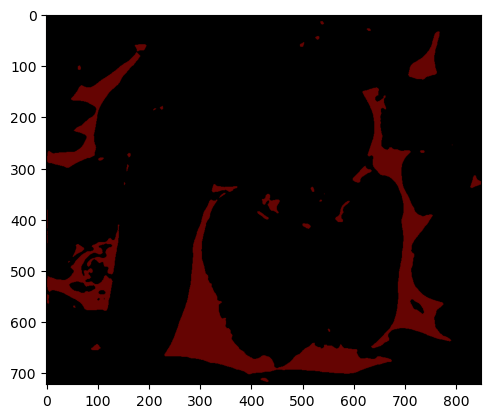

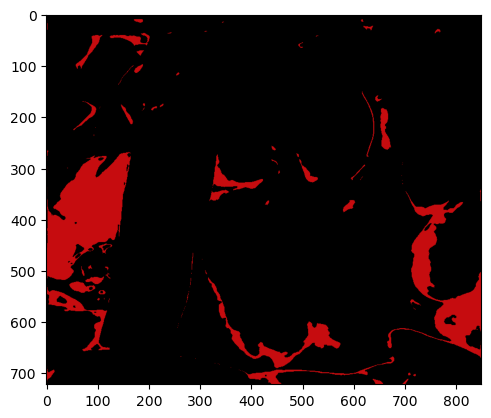

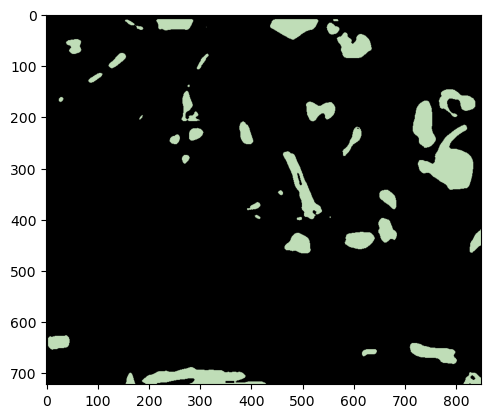

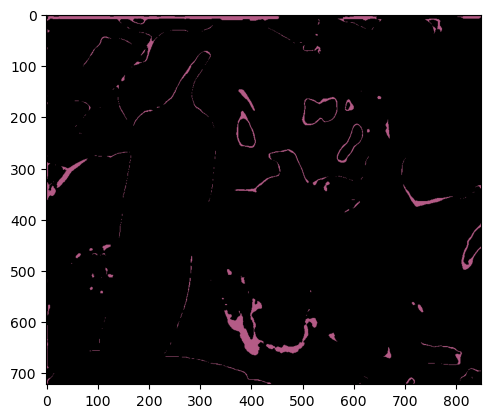

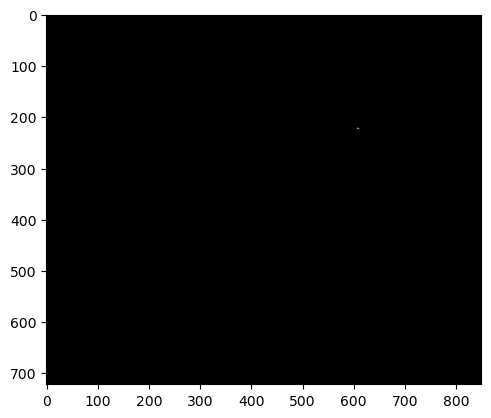

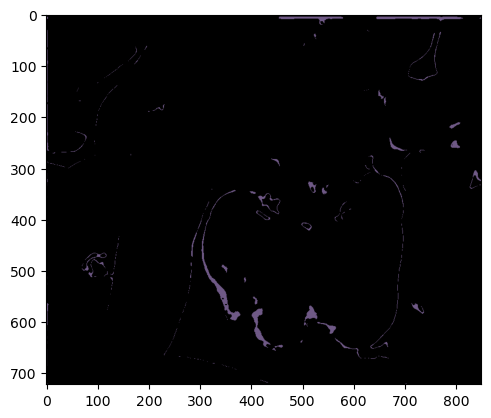

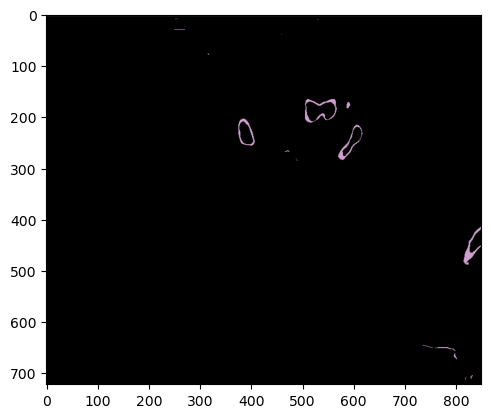

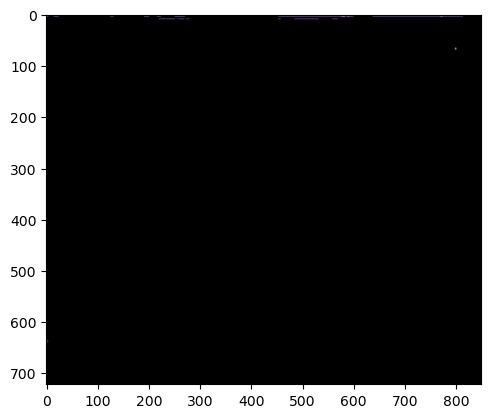

In [25]:
#plotting each cluster to a value 

for label in np.unique(labeled):
    result=np.zeros(X.shape,dtype=np.uint8)
    result[labeled==label,:]=cluster_int8[label,:]  
    plt.imshow(cv.cvtColor(result.reshape(img.shape), cv.COLOR_BGR2RGB))
    plt.show()

In [26]:
#This classifies each vegetable in the image according to their color

In [27]:
#Applying this algorithm to titanic survival data set

In [28]:
#Read the dataset 

data= pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
#dropping other fields for simplicity 

data=data.drop(columns=['Name','Ticket','Cabin','PassengerId','Embarked'])

In [37]:
#Assign gender as 0 or 1

data.loc[data['Sex']!='male','Sex']=0
data.loc[data['Sex']=='male','Sex']=1

In [38]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [39]:
data.isna().sum()  #num of missing values

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [46]:
#should replace values/ elimate values when found missing to avoid errors

In [41]:
#drop the target variable and assign it to the cluster x
X=data.drop(columns=['Survived'])
X=data.apply(lambda x: (x-x.mean())/(x.std()+0.0000001), axis=0)
X.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,-0.788829,0.826913,0.0,-0.592148,0.432550,-0.473408,-0.502163
1,1.266278,-1.565228,0.0,0.638430,0.432550,-0.473408,0.786404
2,1.266278,0.826913,0.0,-0.284503,-0.474279,-0.473408,-0.488580
3,1.266278,-1.565228,0.0,0.407697,0.432550,-0.473408,0.420494
4,-0.788829,0.826913,0.0,0.407697,-0.474279,-0.473408,-0.486064


In [42]:
#Applying mean-shit algorithm to X

bandwidth = estimate_bandwidth(X)
ms = MeanShift(bandwidth=bandwidth , bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=2.3669301456535368, bin_seeding=True)

In [43]:
#analyse the data 

X['cluster']=ms.labels_
data['cluster']=ms.labels_

data.groupby('cluster').mean().sort_values(by=['Survived'], ascending=False)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
cluster,,,,,,,
5,1.000000,1.000000,0.0,35.333333,0.000000,0.333333,512.329200
2,0.790698,1.000000,0.0,30.249220,0.651163,1.093023,170.480519
0,0.372272,2.337612,0.0,30.653411,0.286264,0.191271,22.183755
1,0.266667,2.888889,0.0,9.095477,3.311111,1.555556,31.061576
3,0.230769,2.923077,0.0,38.076923,0.692308,4.230769,30.579485
4,0.000000,3.000000,0.0,29.699118,8.000000,2.000000,69.550000
6,0.000000,1.000000,0.0,64.000000,1.000000,4.000000,263.000000


In [45]:
#These values are generated based on mean-shift analysis, giving the information about survivors of each category